<a href="https://colab.research.google.com/github/yuji-matsunami/word2vec_demo/blob/feature/M1_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vecの実習

## 初めに

- Wrod2Vec学習済みモデルをダウンロードしてください
    - [日本語 Wikipedia エンティティベクトル](http://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/)
    - 20170201.tar.bz2 (2017年2月1日版, 1.3GB, 解凍後 2.6GB)てやつ
    - ダウンロードしたらドライブに保存
    - ドライブのディレクトリからカレントディレクトリにコピーして解凍する(5分くらいかかります)
        - 「!」を使えばLinuxコマンドが使えます(例えばコピーしたいときは「!cp ○○ ○○」)
    - .binのファイルをpythonで読み込ませる
    

In [ ]:
# driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ドライブにあるファイルをカレントディレクトリにコピー
!cp /content/drive/MyDrive/20170201.tar.bz2 .

# コピーしたファイルを展開する
!tar -jxvf 20170201.tar.bz2

entity_vector/
entity_vector/entity_vector.model.txt
entity_vector/entity_vector.model.bin
^C


In [ ]:
# ライブラリのインポート
from gensim.models import KeyedVectors

# modelの読み込み
model = KeyedVectors.load_word2vec_format("/content/entity_vector/entity_vector.model.bin", binary=True)

# 単語ベクトルを見てみよう

- word2vecは単語の意味をベクトル化する技術
- 下のコードで単語をベクトル化できます
    - model["ベクトル化したい単語"]
- ベクトルの次元数を見たいときは後ろに.shapeをつける

In [ ]:
# 単語ベクトルを表示
print(model["徳島県"])

# 単語ベクトルの形状を表示
print(model["徳島県"].shape)

[-0.36937952  0.39327127  0.962526    0.11396863 -0.31391037  0.30283377
  0.06222774  0.21780477  0.3249089   0.53976893 -1.1655247   0.51782435
  0.2291862  -0.37818933  0.36451265 -0.17299128  0.35903683  0.7618156
 -0.43265322 -0.8348384  -0.7318313  -0.193996    0.0849961  -1.5527563
  0.38954034 -0.03761116  0.07277089 -0.10369919  0.04436478 -0.59187
 -0.19722085  0.2563975   0.62914723 -0.28630564  0.62698734  0.6360709
  0.3800281  -0.13499632 -0.12350386 -0.06900103 -0.2845885   0.06644206
 -0.27475128 -0.18265377  0.4019278  -0.11878568  0.30006772  0.3142287
  0.21725841  0.14329945  0.04850295 -0.9127257  -0.06454241 -0.04637592
  0.13374929 -0.5026879  -0.5991166   0.9856819   0.23188594  0.3377967
  0.18835548  0.88108313 -0.73468596 -1.0329183  -0.15926436  0.1630598
  0.28322056  0.10758661  0.26630124 -0.5630826   0.22937863 -0.07117989
  0.03599849  0.3295657   0.23761286 -0.17044511 -0.05755287 -0.43906775
  0.5811544   0.15947841  0.5783042   0.06437678 -0.17959477

In [ ]:
# 上のセルを参考にして好きな単語ベクトルを見てみよう

# 単語の類似度を計算しよう

## ある単語と似ている単語を表示したり,単語間のcos類似度を計算できます

- 似ている単語をいっぱい表示したい
    - model.most_similat(["単語"])
- 単語間のcos類似度を計算したい
    - model.wv.similarity("単語1","単語2")


In [ ]:
# 徳島とのcos類似度が多きい上位10単語を表示
results = (model.most_similar(["徳島"]))
for result in results:
    print(result)

('岡山', 0.8189542889595032)
('高知', 0.8133323192596436)
('鳥取', 0.8014235496520996)
('熊本', 0.7959524393081665)
('富山', 0.787600040435791)
('金沢', 0.7870218753814697)
('佐賀', 0.7843206524848938)
('愛媛', 0.7690701484680176)
('浜松', 0.7656474113464355)
('新潟', 0.7651026248931885)


In [ ]:
# 上のセルを参考にして類似語を見てみよう

In [ ]:
print(model.wv.similarity("徳島","香川"))

0.74451846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
# 上のセルを参考にしてcos類似度を計算してみよう

# 単語の足し引きをしよう

- positiveに足す単語,negativeに引く単語を書く

In [ ]:
results = model.most_similar(positive=["王様", "女"], negative=["男"])
for result in results:
    print(result)


('お姫様', 0.7259089946746826)
('[シンデレラ]', 0.6741881370544434)
('貴婦人', 0.6695671081542969)
('[アリス_(不思議の国のアリス)]', 0.6475884914398193)
('花嫁', 0.6458605527877808)
('妖精', 0.6455655097961426)
('道化師', 0.6381884813308716)
('姫君', 0.6307607889175415)
('魔女', 0.6281230449676514)
('魔法使い', 0.6276963949203491)


In [ ]:
# 上のセルを参考にして単語の足し引きをしてみよう

# 単語を可視化してみよう

- 意味的に近い単語の分布を知りたい場合は2次元の分布図を作成すればわかりやすい 
- 200次元のベクトルを2次元にするには主成分分析(PCA)を用いる
- matplotlibというライブラリを利用して分布図を作成する

In [ ]:
# ライブラリのインストール
!pip install japanize-matplotlib

In [ ]:
# ライブラリのインポート
from sklearn.decomposition import PCA #主成分分析器
import matplotlib.pyplot as plt
import japanize_matplotlib 
%matplotlib inline

In [ ]:
# 目標単語（検索したい言葉）を決める
target_word = "徳島県"

In [ ]:
#類義語の分散表現をリストに格納
item = model.most_similar(target_word,topn=1000) #topn:似ている単語を何個取得するか
data = [] #類義語の分散表現を格納
words = [] #類義語名を格納
words.append([target_word,'r'])
data.append(model[target_word])
for index,word in enumerate(item):
    if index % 100 == 0: #1番似ている単語から100個刻みで取得
        print(word)
        words.append([word[0],'b'])
        data.append(model[word[0]])

('香川県', 0.8651489019393921)
('淡路島', 0.6386263966560364)
('[津和野町]', 0.618722677230835)
('[あわら市]', 0.6083723306655884)
('[三条市]', 0.5998075008392334)
('[御津郡]', 0.5947537422180176)
('[阿智村]', 0.589626133441925)
('南信', 0.5838637351989746)
('[荒尾市]', 0.5785807371139526)
('[佐々町]', 0.5731993317604065)


In [ ]:
#主成分分析により２次元に圧縮する
pca = PCA(n_components=2)
pca.fit(data)
data_pca= pca.transform(data)

In [ ]:
#プロットの準備
fig=plt.figure(figsize=(10,6),facecolor='w')
plt.rcParams["font.size"] = 10

<Figure size 720x432 with 0 Axes>

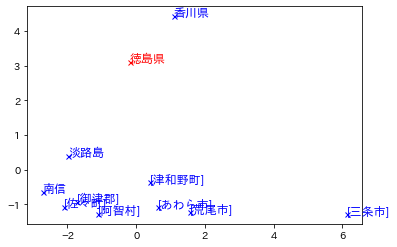

In [ ]:
#プロット
i = 0
while i < len(data):
    #点プロット
    plt.plot(data_pca[i][0], data_pca[i][1], ms=5.0, zorder=2, marker="x", color=words[i][1])
 
    #文字プロット
    plt.annotate(words[i][0], (data_pca[i][0], data_pca[i][1]), size=12,color=words[i][1])
    i += 1

#グラフの出力
plt.show()